In [4]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [5]:
env = BlackjackEnv()

In [16]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    # V = defaultdict(float)
    
    for ep in range(num_episodes):
        obs = env.reset()
        steps = []
        for t in range(100):
            action = policy(obs)
            new_obs, reward, stop, _ = env.step(action)
            steps.append((obs, action, reward))
            obs = new_obs
            if stop:
                break
        seen = set()
        for i in range(len(steps)):
            obs = steps[i][0]
            if not obs in seen:
                seen.update([obs])
                returns_sum[obs] += sum([r * (discount_factor ** t) for t, (_, _, r) in enumerate(steps[i:])])
                returns_count[obs] += 1
    V = {obs: returns_sum[obs]/returns_count[obs] for obs in returns_sum}

    return V    

In [17]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [18]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10)

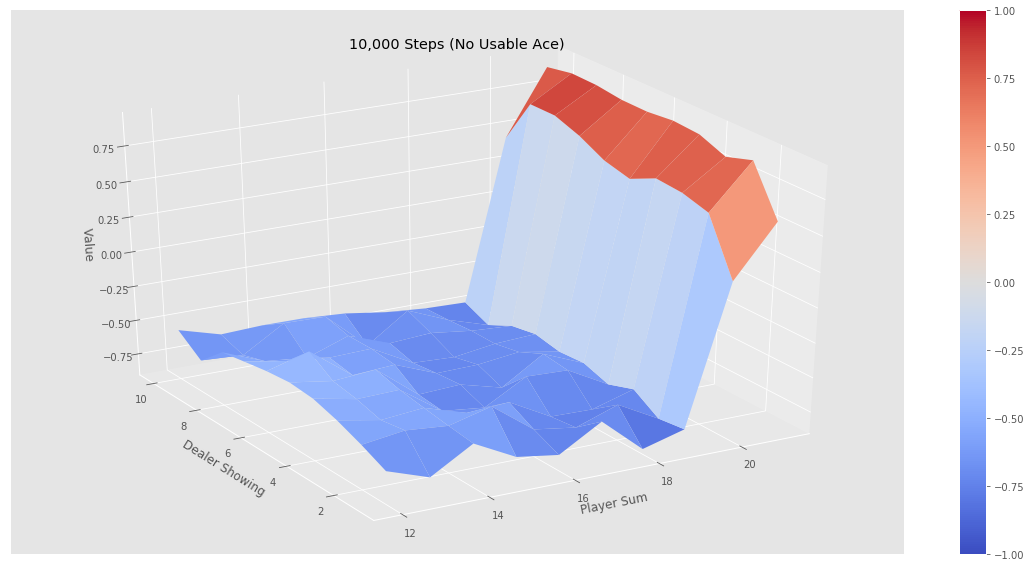

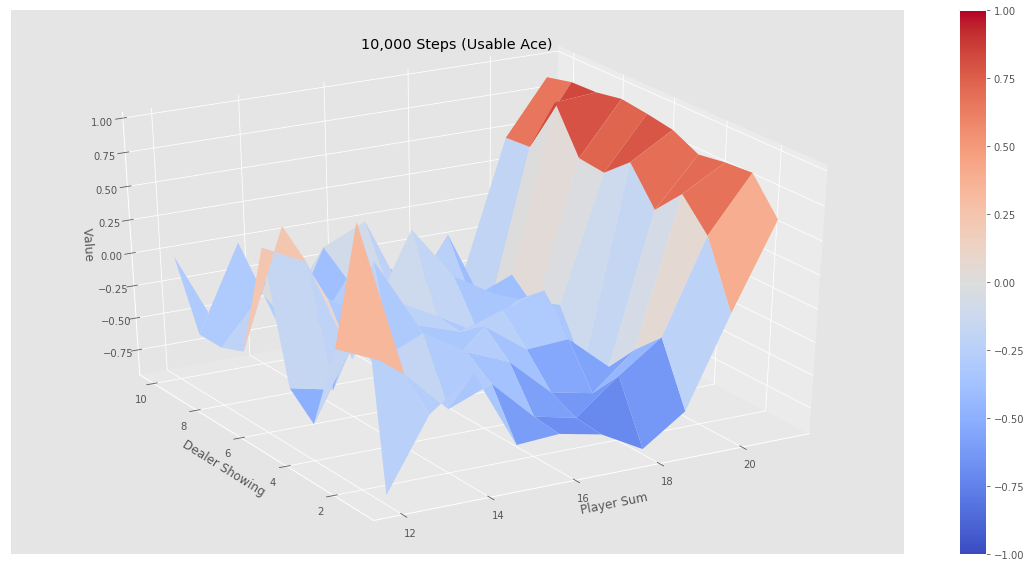

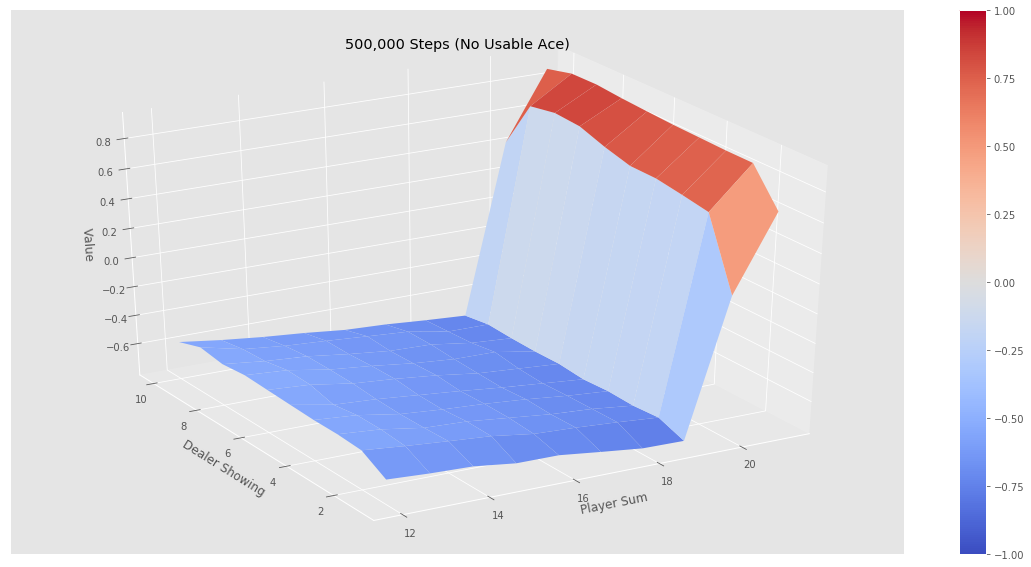

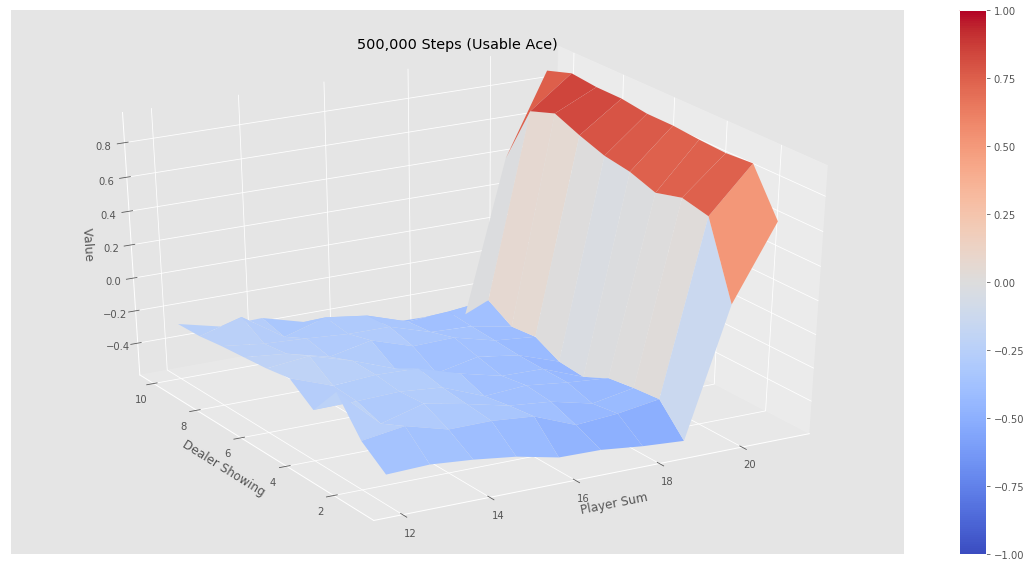

In [19]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")